<a href="https://colab.research.google.com/github/johanhoffman/methods-in-computational-science/blob/main/MICS_Integration_jacwah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: Integration**
**Jacob Wahlgren**

# **Abstract**

Four numerical methods for integration are implemented and compared to known closed form solutions. All the exactness and convergence tests pass.

#**About the code**

The code was written by Jacob Wahlgren, based on a template by Johan Hoffman.

In [1]:
# Copyright (C) 2020,2021 Johan Hoffman (jhoffman@kth.se)
# Copyright (C) 2021 Jacob Wahlgren (jacobwah@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

# **Set up environment**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# **Introduction**

Numerical methods for approximation of integrals are called quadrature. A quadrature rule is defined by a set of interpolation points $\{x_i\}^q_{i=0}$ and a set of weights $\{w_i\}_{i=0}^q$ such that

$\displaystyle \int_a^b f(x) dx \approx \sum_{i=0}^q f(x_i) w_i.$

There are many quadrature rules for different types of integrals. Gauss quadrature uses the roots of an orthogonal polynomial as quadrature points. With $q+1$ points Gauss quadrature is exact for polynomials up to degree $2q+1$. Monte Carlo quadrature uses random points instead.

# **Method**

### 2-point Gauss quadrature over unit interval
In the related problem set, I calculated the 2-point Gauss quadrature formula over $[0,1]$ to be

$\displaystyle \int_0^1 f(x) dx \approx \tfrac{1}{2} \Bigl[f\Bigl(\tfrac{1}{2} + \tfrac{1}{2\sqrt{3}}\Bigr) +
f\Bigl(\tfrac{1}{2}-\tfrac{1}{2\sqrt{3}}\Bigr)\Bigr].$


In [3]:
def gauss2pt(f):
    return 1/2 * (f(1/2 + 1/(2*sqrt(3))) + f(1/2 - 1/(2*sqrt(3))))

The approximation is verified to be exact for cubic polynomials by comparing the results for randomized polynomials to the closed form solution

$\displaystyle \int_0^1 \bigl(a_0 + a_1 x + a_2 x^2 + a_3 x^3\bigr)dx = a_0 + \tfrac{1}{2}a_1 + \tfrac{1}{3}a_2 + \tfrac{1}{4}a_3.$

In [4]:
def test_gauss2pt():
    for i in range(100):
        a = np.random.rand(4)
        f = lambda x: a[0] + a[1]*x + a[2]*x**2 + a[3]*x**3
        approx = gauss2pt(f)
        exact = a[0] + 1/2*a[1] + 1/3*a[2] + 1/4*a[3]
        np.testing.assert_almost_equal(approx, exact)
    print("test_gauss2pt ok")

### 3-point edge midpoint quadrature over reference triangle

Let $T$ be the reference triangle with vertices $\{(0,0),(1,0),(0,1)\}$. The 3-point edge midpoint rule for $T$ is defined in Example 11.5 of the lecture notes.

$\displaystyle \int_T f(x,y) dA \approx \tfrac{1}{6} \left[ f\left(\tfrac{1}{2},\tfrac{1}{2}\right) + f\left(\tfrac{1}{2},0\right) + f\left(0,\tfrac{1}{2}\right) \right]$

In [5]:
def edge3midpoint(f):
    return 1/6 * (f(1/2,1/2) + f(1/2,0) + f(0,1/2))

The approximation is verified to be exact for quadratic polynomials by comparing the results for randomized polynomials to the closed form solution

$\displaystyle \int_T \bigl(a_0 + a_1 x + a_2 y + a_3 xy + a_4 x^2 + a_5 y^2\bigr)dx = \tfrac{1}{2}a_0 + \tfrac{1}{6}a_1 + \tfrac{1}{6}a_2 + \tfrac{1}{24}a_3 + \tfrac{1}{12}a_4 + \tfrac{1}{12}a_5.$

In [6]:
def test_edge3midpoint():
    for i in range(100):
        a = np.random.rand(6)
        f = lambda x,y: a[0] + a[1]*x + a[2]*y + a[3]*x*y + a[4]*x**2 + a[5]*y**2
        approx = edge3midpoint(f)
        exact = 1/2*a[0] + 1/6*a[1] + 1/6*a[2] + 1/24*a[3] + 1/12*a[4] + 1/12*a[5]
        np.testing.assert_almost_equal(approx, exact)
    print("test_edge3midpoint ok")

### Monte Carlo quadrature over unit interval

In contrast to the previous methods, Monte Carlo quadrature is non-deterministic. In Monte Carlo quadrature, $n$ quadrature points are chosen uniformly at random and the sample mean multiplied by the domain size is returned. This corresponds to using the weights $w_i=\frac{|D|}{n}$ where $D$ is the domain. For the interval $[0,1]$ the formula is

$\displaystyle \int_0^1 f(x)dx \approx \frac{1}{n} \sum_{i=1}^n f(x_i).$

In [7]:
def monte_carlo_1d(f, n):
    x = np.random.rand(n)
    return np.mean(f(x))

To show that the Monte Carlo quadrature converges at rate $\frac{1}{\sqrt{n}}$, the approximation error is plotted together with the line $\frac{err_1}{\sqrt{n}}$ where $err_1$ is the error at $n=1$. To make the pattern clearer the average of 10 runs is shown. The integrand is a randomized trigonometric function on the form $a_0 \sin x + a_1 \sin^2  x$ with the closed form solution

$\displaystyle \int_0^1 (a_0 \sin x + a_1 \sin^2 x) = a_0(1-\cos 1) + a_1 (\tfrac{1}{2} - \tfrac{1}{4} \sin 2).$

In [8]:
def show_monte_carlo_1d():
    a = np.random.rand(2)
    f = lambda x: a[0]*np.sin(x) + a[1]*np.sin(x)**2
    exact = a[0]*(1-np.cos(1)) + a[1]*(1/2-1/4*np.sin(2))
    err = lambda n: 1/10*sum(abs(monte_carlo_1d(f,n)-exact) for i in range(10))

    xs = np.array(range(1, 100))
    plt.plot(xs, [err(x) for x in xs], label="MC (mean of 10 runs)")
    plt.plot(xs, err(xs[0])/np.sqrt(xs), label="$err_1/\\sqrt{n}$")
    plt.xlabel("Number of points")
    plt.ylabel("Approximation error")
    plt.legend()
    plt.title("Monte Carlo quadrature over unit interval")

### Monte Carlo quadrature over reference triangle
The size of the reference triangle $T$ is $\frac{1}{2}$. Therefore the formula for Monte Carlo quadrature over the reference triangle is

$\displaystyle \int_T f(x)dx \approx \frac{1}{2n} \sum_{i=1}^n f(x_i).$

To generate a random point in $T$, a point in the unit square is generated. If it is above the line $x+y=1$, then it is reflected around this line. The result is a point in $T$ sampled uniformly at random.

In [9]:
def monte_carlo_2d(f, n):
    x = np.random.rand(n)
    y = np.random.rand(n)
    for i in range(n):
        if x[i]+y[i] > 1:
            x[i] = 1 - x[i]
            y[i] = 1 - y[i]
    assert (x+y<=1).all()
    return 1/2*np.mean(f(x,y))

To illustrate the convergence the same method as for the 1D case is used. The integrand used is

$\displaystyle \int_T (a_0 \cos x + a_1 \sin y) dA = a_0(1-\cos 1) + a_1(1-\sin 1).$

In [10]:
def show_monte_carlo_2d():
    a = np.random.rand(2)
    f = lambda x,y: a[0]*np.cos(x) + a[1]*np.sin(y)
    exact = a[0]*(1-np.cos(1)) + a[1]*(1-np.sin(1))
    err = lambda n: 1/10*sum(abs(monte_carlo_2d(f,n)-exact) for i in range(10))

    xs = np.array(range(1, 100))
    plt.plot(xs, [err(x) for x in xs], label="MC (mean of 10 runs)")
    plt.plot(xs, err(xs[0])/np.sqrt(xs), label="$err_1/\\sqrt{n}$")
    plt.xlabel("Number of points")
    plt.ylabel("Approximation error")
    plt.legend()
    plt.title("Monte Carlo quadrature over reference triangle")

# **Results**

The 2-point Gauss quadrature and 3-point edge midpoint pass the exactness tests with randomized polynomials.

In [11]:
test_gauss2pt()
test_edge3midpoint()

test_gauss2pt ok
test_edge3midpoint ok


In both 1D and 2D, the Monte Carlo quadrature converges at rate $\frac{1}{\sqrt{n}}$ as expected.

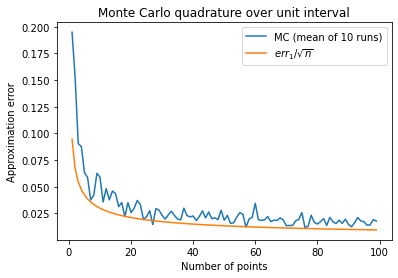

In [12]:
show_monte_carlo_1d()

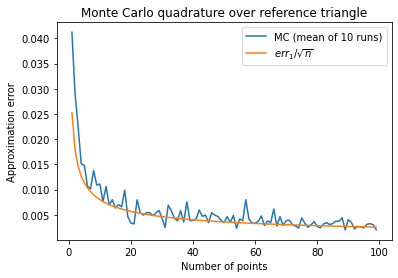

In [13]:
show_monte_carlo_2d()

# **Discussion**

It is possible to easily find closed form solutions to the integral of simple functions. However in more complex situations, e.g. if there is not explicit representation of the function, quadrature can approximate the integral. In fact, I was surprised how few sample points are required to compute the integral, and this probably becomes more important as the number of dimensions increases.

For polynomials, and functions close to polynomials, Gauss quadrature is very efficient. Monte Carlo quadrature is not as efficient, but it will probably work even if you know almost nothing about the function.

In the previous lab I used the convenient `scipy.integrate.quad` function, which does some type of quadrature. Evidently quadrature is useful in a variety of tasks.